In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
columns = np.arange(0,44) # read the 43 columns
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]
zeus_filename = "all_zeus.csv" # declare filenames
normal_filename = "all_normal.csv" #  declare file names
df_zeus = pd.read_csv(zeus_filename, usecols=columns, names=names) # read files as data frame
df_zeus['is_botnet'] = 1 #  all examples in zeus file are botnets
print(len(df_zeus)) # 
df_zeus.head() #  first 5 columns 

524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


In [3]:
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names)
normal_df['is_botnet'] = 0
print(len(normal_df))
df_normal = normal_df.iloc[:len(df_zeus), :]
print(len(df_normal))
df_normal.head(10) #  exactly same thing but not botnet we have 843 rows

843
524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,192.168.0.58,50245,216.58.213.99,443,6,5,729,3,1562,40,...,729,3,1562,1,0,0,0,212,132,0
1,192.168.0.58,50240,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
2,192.168.0.58,50239,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
3,192.168.0.58,50243,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
4,192.168.0.58,50261,216.58.206.78,443,6,6,769,5,3009,40,...,769,5,3009,1,1,0,0,252,212,0
5,192.168.0.58,50263,216.58.206.130,443,6,6,781,4,3032,40,...,781,4,3032,1,0,0,0,264,172,0
6,192.168.0.58,50267,40.77.229.141,443,6,17,14162,27,12726,40,...,14162,27,12726,6,13,0,0,692,1092,0
7,192.168.0.58,50269,216.58.212.99,443,6,10,1204,9,4455,40,...,1204,9,4455,4,4,0,0,412,372,0
8,192.168.0.58,50273,191.232.139.2,443,6,14,6178,15,6023,40,...,6178,15,6023,6,9,0,0,572,612,0
9,192.168.0.58,50275,188.121.36.239,80,6,6,696,6,2519,40,...,696,6,2519,1,1,0,0,252,252,0


In [4]:
data = pd.concat([df_zeus, df_normal])
print(len(data))
data = data.sample(frac=1)
data.head()

1048


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
190,192.168.0.58,50310,130.211.34.183,443,6,98,135601,191,16791,40,...,22600,31,2798,53,92,0,0,3932,7652,0
119,10.0.3.7,18992,76.178.80.190,20276,17,1,118,0,0,118,...,118,0,0,0,0,0,0,28,0,1
154,192.168.0.58,50406,87.248.98.8,443,6,91,8719,151,142758,40,...,4359,75,71379,16,98,0,0,3652,6052,0
176,192.168.0.58,50278,195.95.193.223,443,6,1190,386821,2006,2467345,40,...,42980,222,274149,174,502,0,0,48800,80276,0
279,10.0.1.4,26173,108.94.130.215,24606,17,435,78856,435,625222,78,...,78856,435,625222,0,0,0,0,8708,8700,1


In [5]:
data[data.isnull().any(axis=1)].head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet


In [6]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

In [7]:
data.isnull().any(axis=0)

srcip             False
srcport           False
dstip             False
dstport           False
proto             False
total_fpackets    False
total_fvolume     False
total_bpackets    False
total_bvolume     False
min_fpktl         False
mean_fpktl        False
max_fpktl         False
std_fpktl         False
min_bpktl         False
mean_bpktl        False
max_bpktl         False
std_bkptl         False
min_fiat          False
mean_fiat         False
max_fiat          False
std_fiat          False
min_biat          False
mean_biat         False
max_biat          False
std_biat          False
duration          False
min_active        False
mean_active       False
max_active        False
std_active        False
min_idle          False
mean_idle         False
max_idle          False
std_idle          False
sflow_fpackets    False
sflow_fbytes      False
sflow_bpackets    False
sflow_bbytes      False
fpsh_cnt          False
bpsh_cnt          False
furg_cnt          False
burg_cnt        

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 190 to 424
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   srcip           1048 non-null   object
 1   srcport         1048 non-null   int64 
 2   dstip           1048 non-null   object
 3   dstport         1048 non-null   int64 
 4   proto           1048 non-null   int64 
 5   total_fpackets  1048 non-null   int64 
 6   total_fvolume   1048 non-null   int64 
 7   total_bpackets  1048 non-null   int64 
 8   total_bvolume   1048 non-null   int64 
 9   min_fpktl       1048 non-null   int64 
 10  mean_fpktl      1048 non-null   int64 
 11  max_fpktl       1048 non-null   int64 
 12  std_fpktl       1048 non-null   int64 
 13  min_bpktl       1048 non-null   int64 
 14  mean_bpktl      1048 non-null   int64 
 15  max_bpktl       1048 non-null   int64 
 16  std_bkptl       1048 non-null   int64 
 17  min_fiat        1048 non-null   int64 
 18  mean_fi

In [9]:
data.describe()

,srcport,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,mean_fpktl,max_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.0,1048.0,1048.000000,1048.000000,1048.000000
mean,34002.579198,6950.801527,13.294847,25.419847,3925.868321,34.547710,4.344807e+04,105.569656,159.251908,473.715649,...,1632.139313,13.336832,1.625758e+04,2.351145,3.907443,0.0,0.0,881.736641,1233.438931,0.500000
std,21633.969317,10215.669372,5.201378,160.799309,22571.931715,280.688187,4.124589e+05,79.705528,166.769398,1274.711514,...,7293.982042,72.355010,1.056138e+05,10.151610,26.277158,0.0,0.0,6556.541592,11113.394555,0.500239
min,67.000000,53.000000,6.000000,1.000000,54.000000,0.000000,0.000000e+00,40.000000,41.000000,54.000000,...,54.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
25%,15684.000000,53.000000,6.000000,1.000000,110.750000,0.000000,0.000000e+00,40.000000,73.000000,94.000000,...,106.750000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
50%,38529.000000,443.000000,17.000000,2.000000,316.500000,1.000000,1.885000e+02,69.000000,128.000000,207.500000,...,262.000000,1.000000,1.800000e+02,0.000000,0.000000,0.0,0.0,48.000000,20.000000,0.500000
75%,50482.250000,16563.750000,17.000000,10.000000,1244.000000,8.250000,4.003000e+03,161.000000,182.500000,494.000000,...,693.000000,6.000000,2.576750e+03,1.000000,2.000000,0.0,0.0,412.000000,358.000000,1.000000
max,65510.000000,29996.000000,17.000000,4278.000000,479966.000000,7916.000000,1.186256e+07,334.000000,2036.000000,16078.000000,...,78856.000000,1583.000000,2.372511e+06,191.000000,502.000000,0.0,0.0,182920.000000,316652.000000,1.000000


In [10]:
y=data['is_botnet']
y.value_counts()

1    524
0    524
Name: is_botnet, dtype: int64

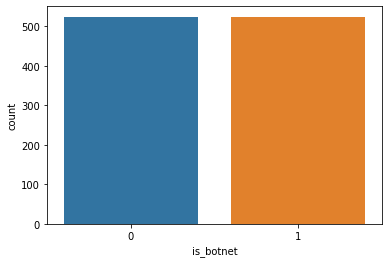

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data= data, x = "is_botnet")
plt.show()

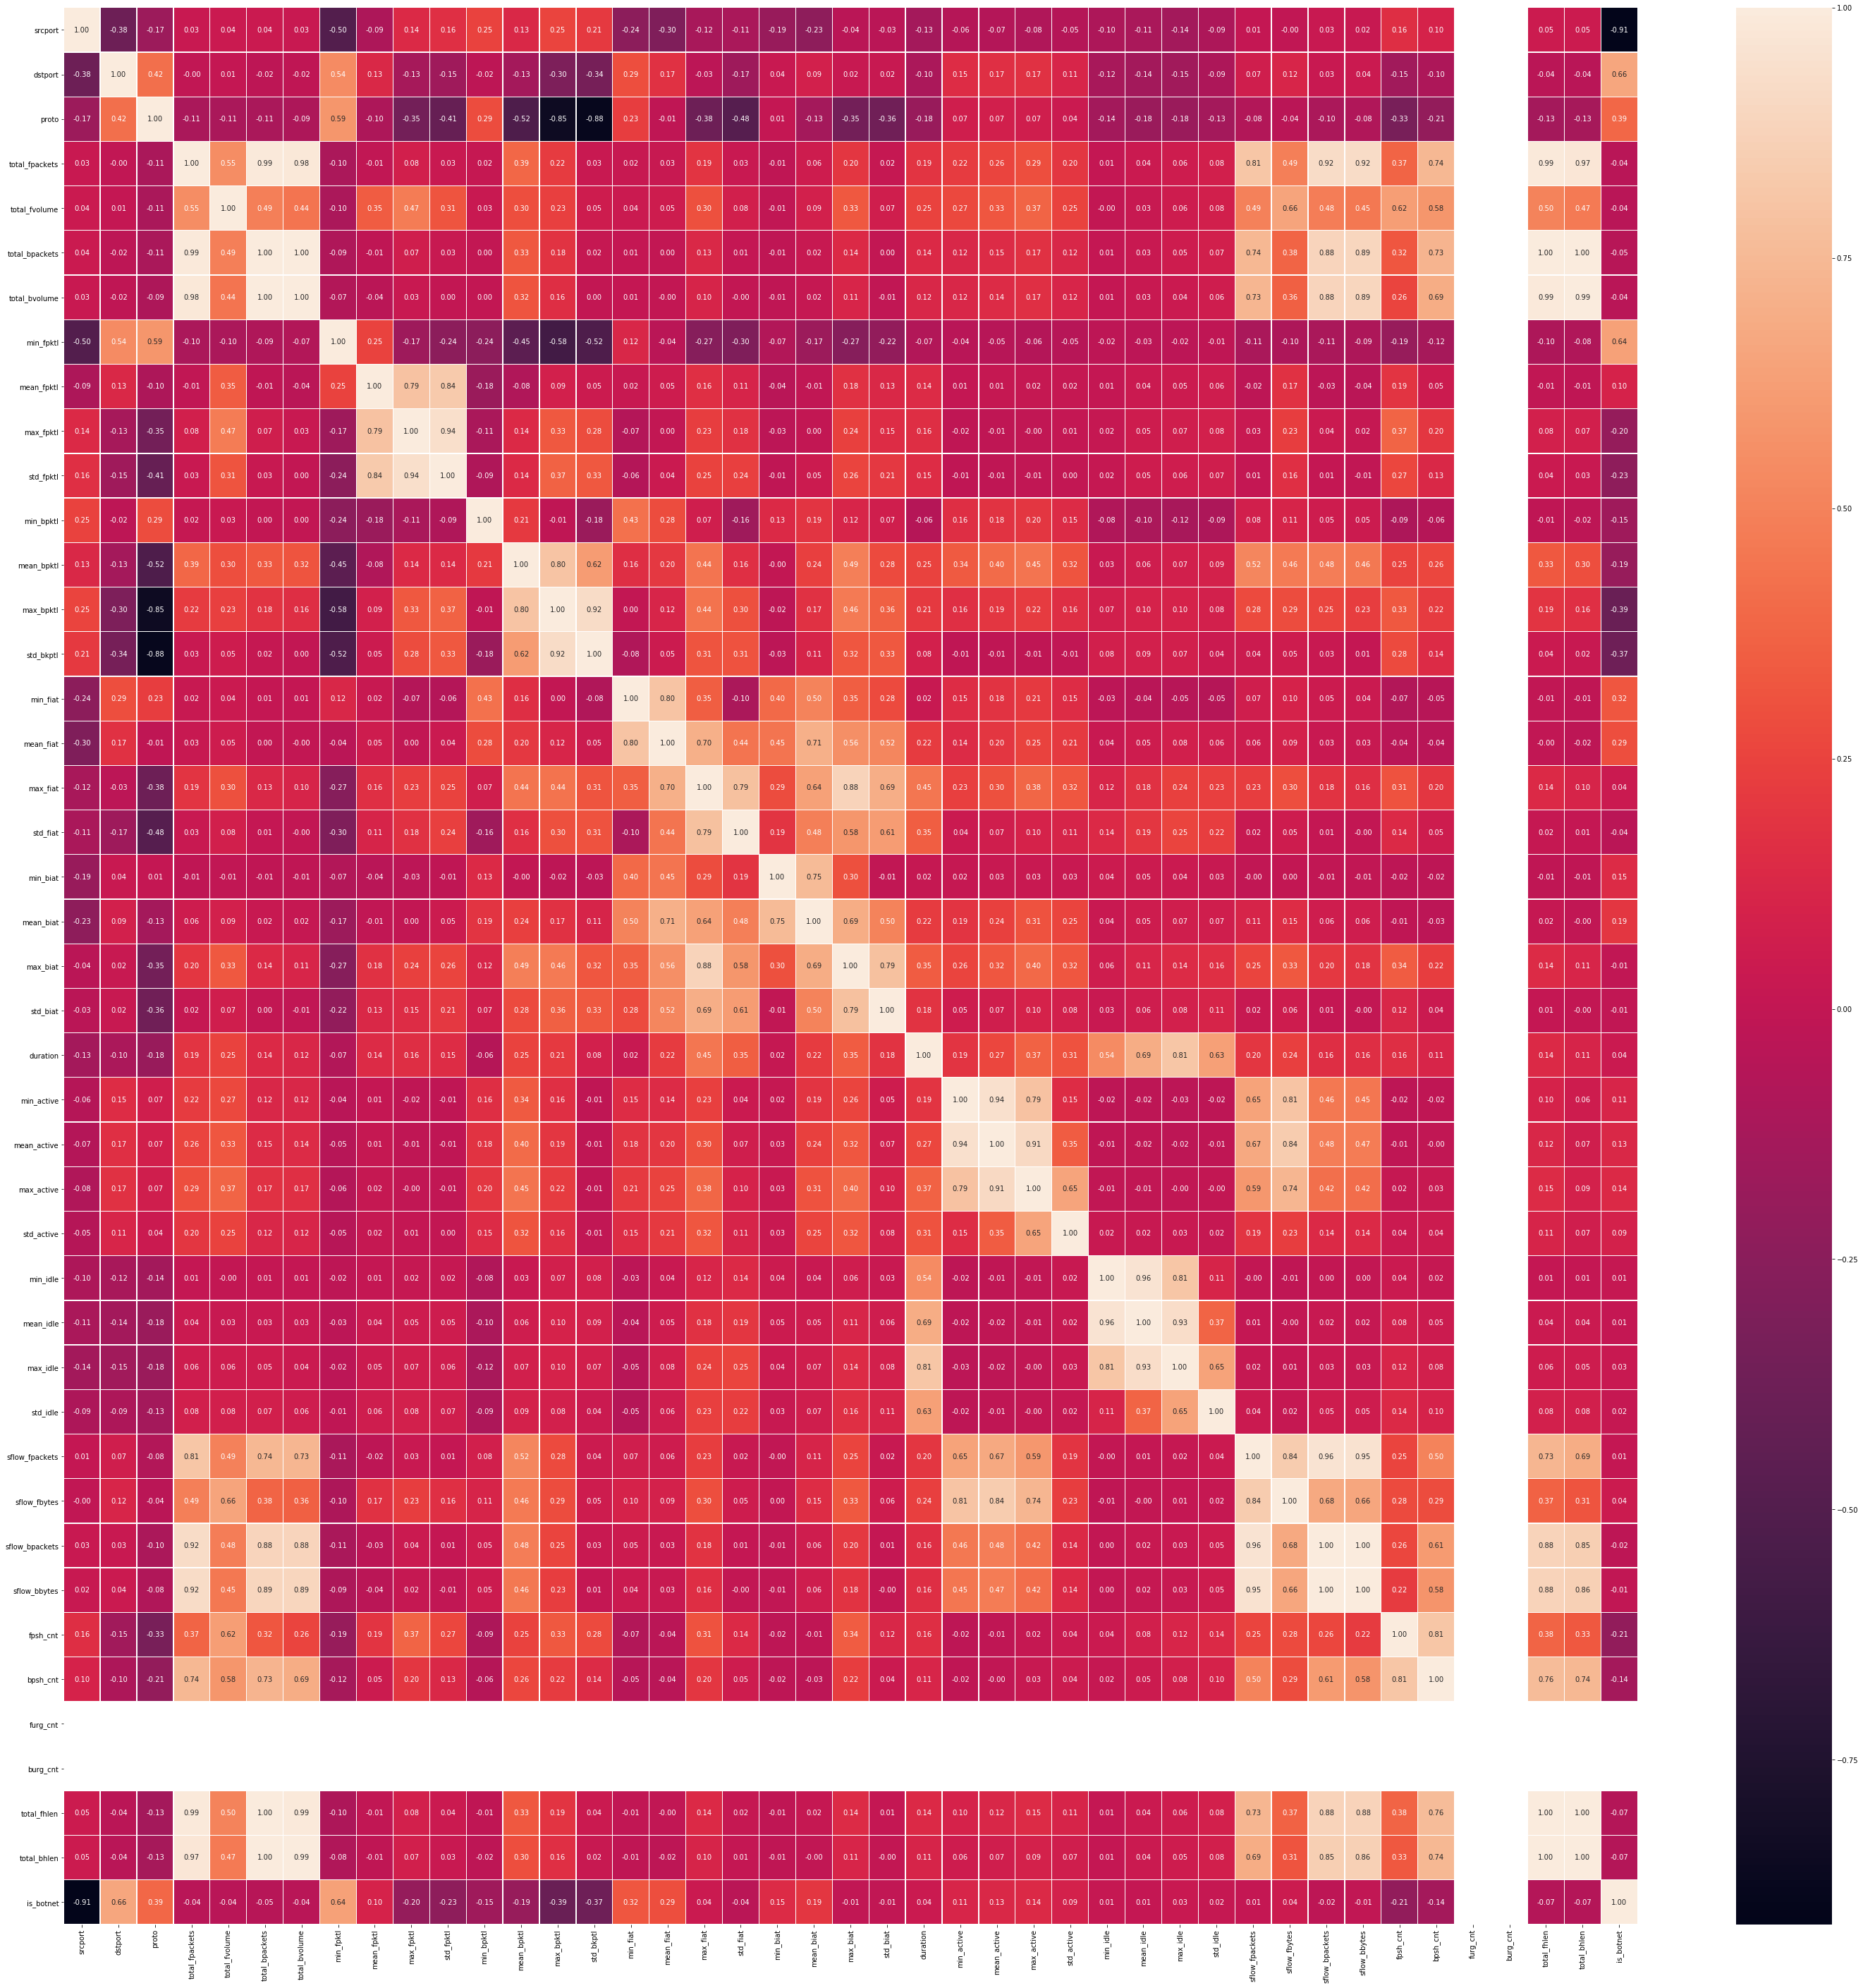

In [12]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

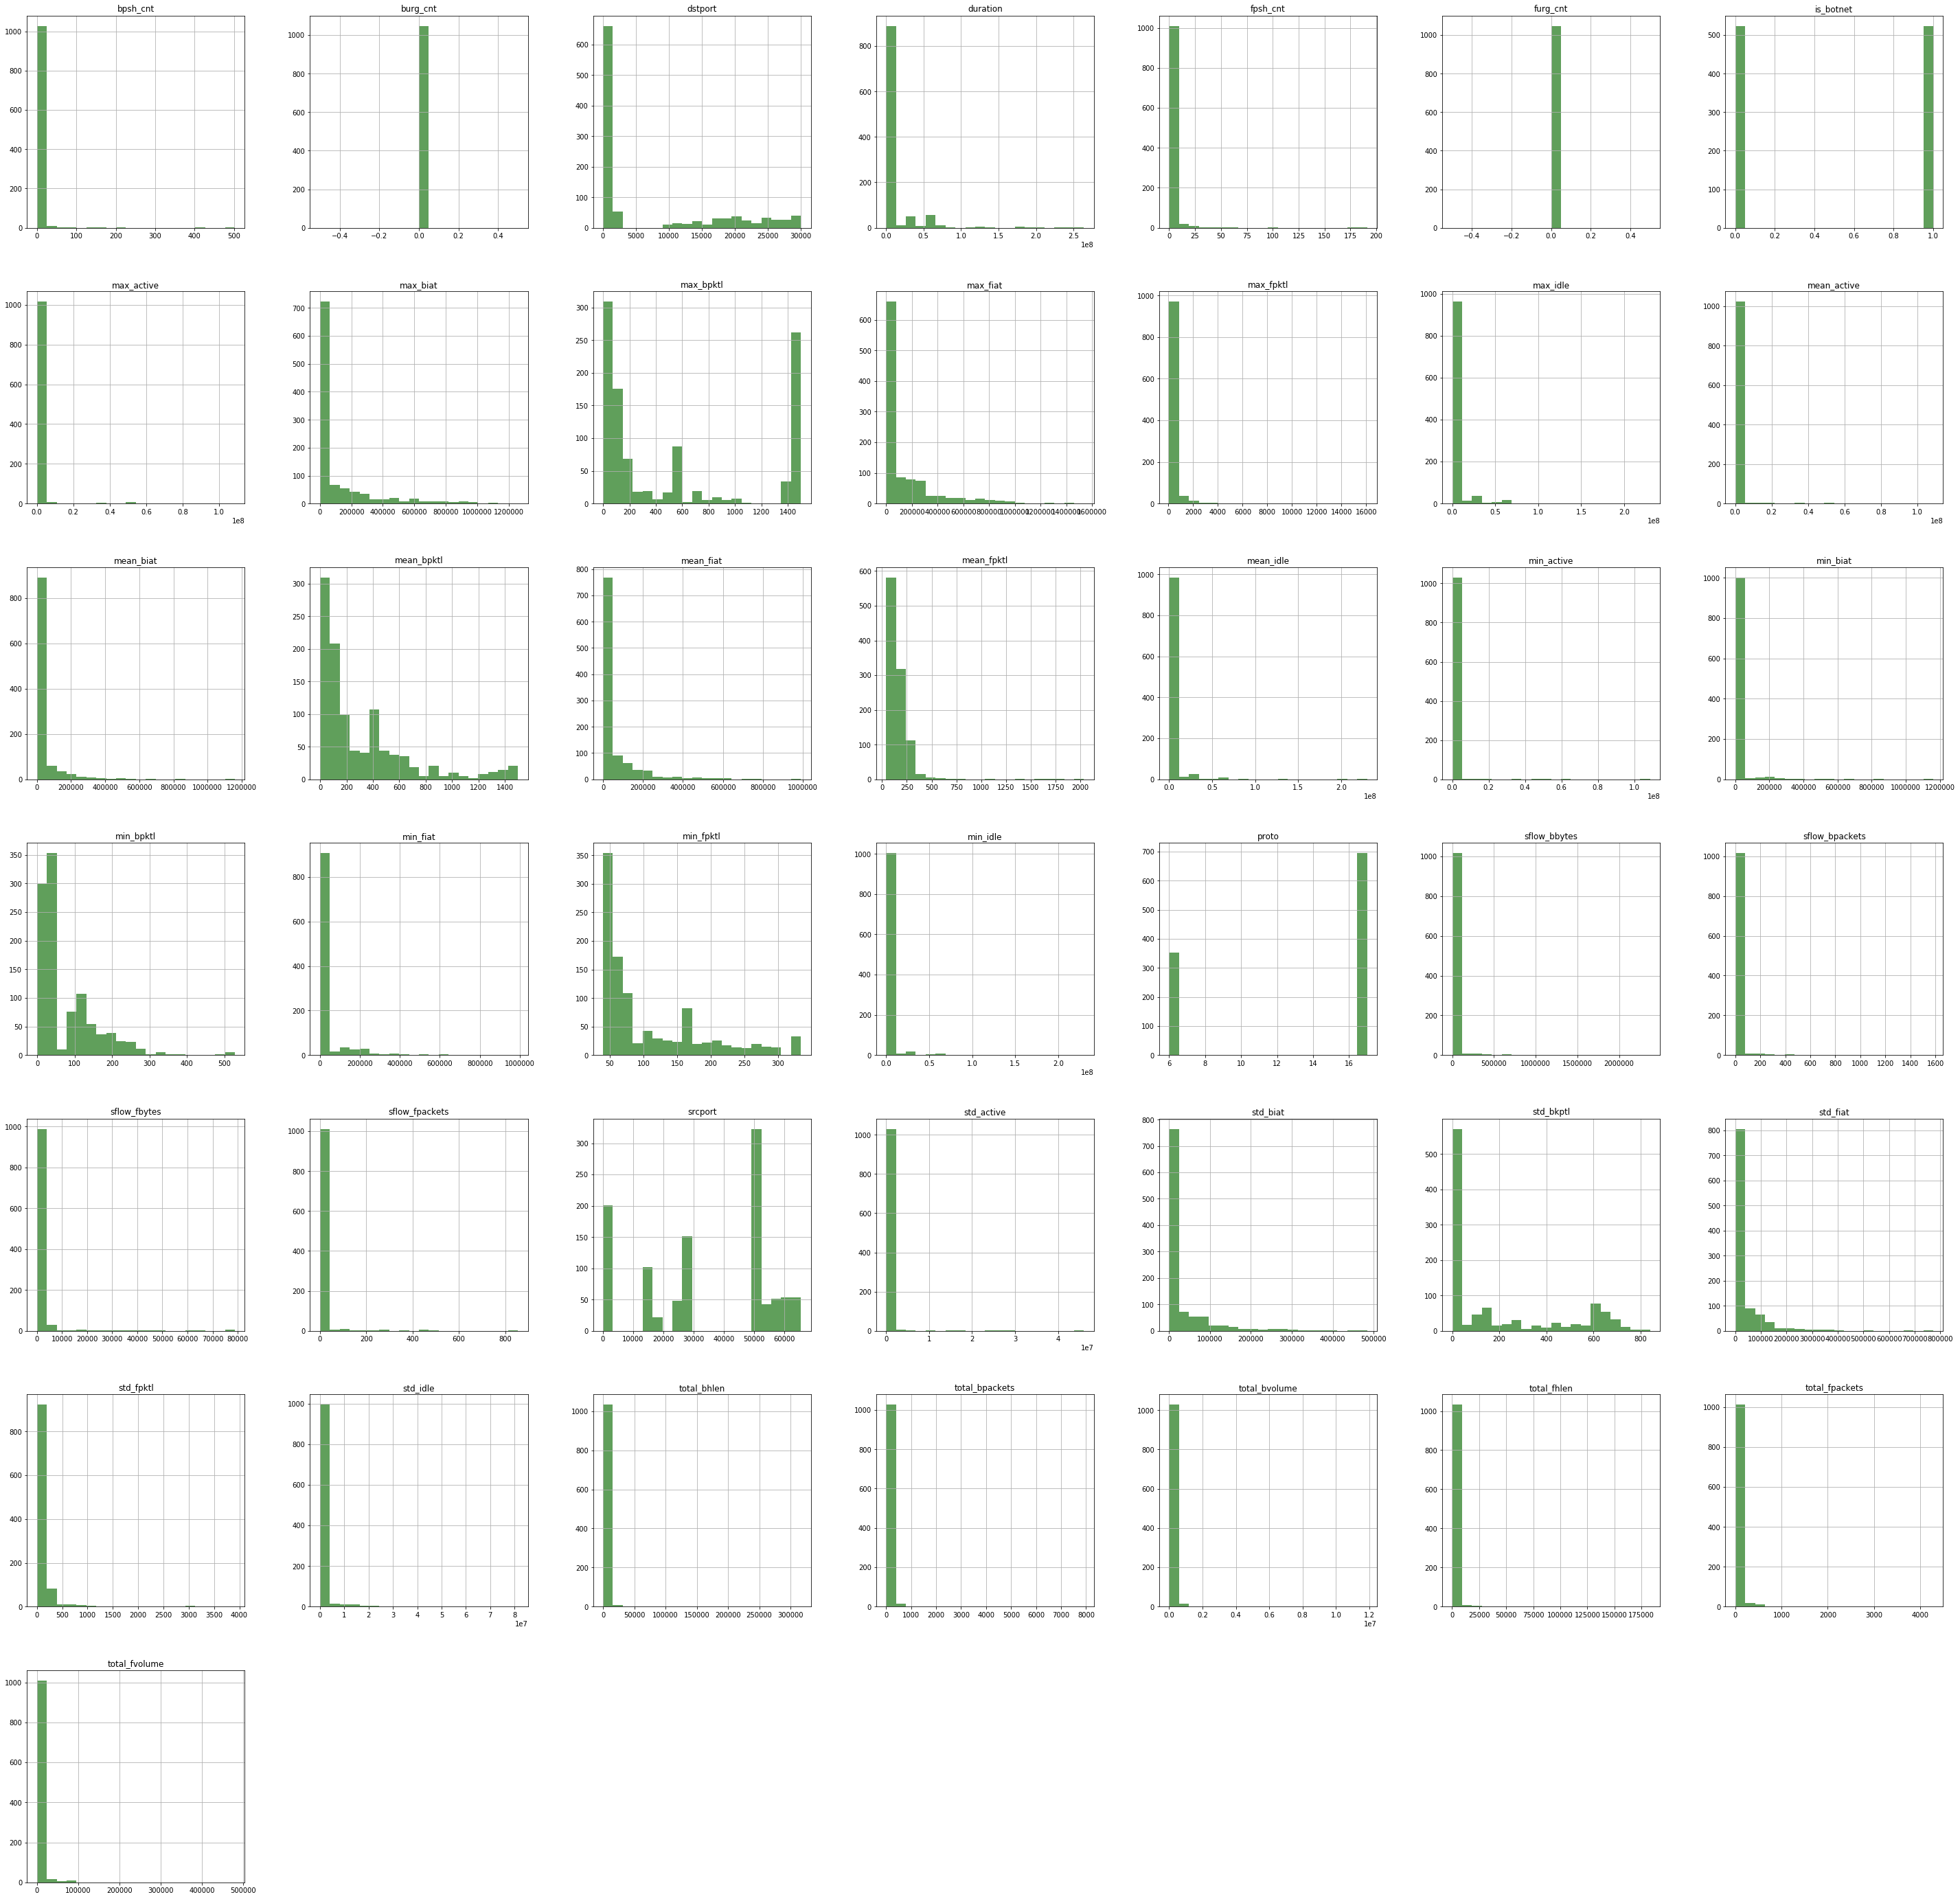

In [13]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

#### Preparing data to apply SMOTE technique

In [14]:
# Using the unbalanced data
data_all = pd.concat([df_zeus, normal_df])
data_all=data_all[['duration','max_active','max_biat','max_bpktl','max_fiat','mean_bpktl','mean_fpktl','min_active','min_bpktl','min_fpktl','std_active','std_bkptl','is_botnet']]
data_all.shape

(1367, 13)

In [15]:
X=data_all.drop(columns=['is_botnet'])
y=data_all.is_botnet

# Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (1025, 12)
y_train shape:  (1025,)
X_test shape:  (342, 12)
y_test.shape:  (342,)


In [19]:
# SMOTE technique on train
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [20]:
from collections import Counter
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 640, 1: 385})
After SMOTE :  Counter({0: 640, 1: 640})


## FEATURE SELECTION USING EMBEDDED METHOD
The reason we choose embedded method was because they are iterative in a sense that the model training process. Regularization techniques are more most commonly used in these techniques,lassoCV regularization is the basic of all the embedded methods.

In [21]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 74133.245512
Best score using built-in LassoCV: 0.026605


In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

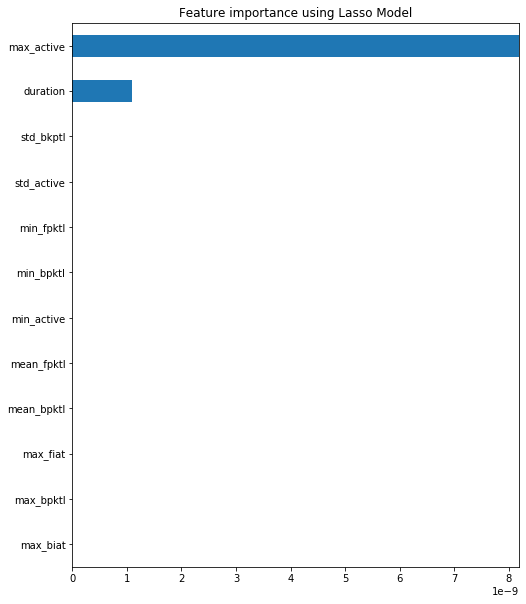

In [23]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

so now our major features are max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_fiat,
max_bpktl,max_fiat,max_bpktl,max_biat, **we will work on these feature** 

# Correlation between the features

In [136]:
feature_coorelation=data[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl',
'max_bpktl','max_fiat','max_biat']]

In [139]:
feature_coorelation.head()

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
190,2351553,55642864,147,933756,40,40,103424,1383,87,1470,737851,697130
119,0,0,0,0,118,-1,0,118,-1,-1,0,0
154,1631333,8798393,616,1050296,40,40,145989,95,945,1500,507150,571830
176,10044256,57574667,469,3263400,40,40,13840,325,1229,1500,904848,914947
279,63246522,63246522,87,0,78,218,63246522,181,1437,1452,483275,483614


In [140]:
feature_corrmat = feature_coorelation.corr() 
feature_corrmat

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
max_active,1.000000,0.367495,-0.011037,0.650236,-0.064080,0.198797,0.794835,0.019772,0.446083,0.216583,0.383036,0.400739
duration,0.367495,1.000000,0.084491,0.310079,-0.071120,-0.055502,0.190361,0.143321,0.246316,0.207527,0.453334,0.347072
std_bkptl,-0.011037,0.084491,1.000000,-0.006016,-0.520313,-0.180154,-0.012015,0.046127,0.615790,0.919037,0.312072,0.324657
std_active,0.650236,0.310079,-0.006016,1.000000,-0.053553,0.146826,0.152942,0.015388,0.315810,0.155485,0.319998,0.320668
min_fpktl,-0.064080,-0.071120,-0.520313,-0.053553,1.000000,-0.239536,-0.041905,0.248957,-0.452176,-0.578750,-0.269419,-0.268492
min_bpktl,0.198797,-0.055502,-0.180154,0.146826,-0.239536,1.000000,0.157727,-0.178029,0.209321,-0.013624,0.067213,0.115200
min_active,0.794835,0.190361,-0.012015,0.152942,-0.041905,0.157727,1.000000,0.010232,0.341734,0.162611,0.233973,0.259619
mean_fpktl,0.019772,0.143321,0.046127,0.015388,0.248957,-0.178029,0.010232,1.000000,-0.082706,0.086570,0.164106,0.176039
mean_bpktl,0.446083,0.246316,0.615790,0.315810,-0.452176,0.209321,0.341734,-0.082706,1.000000,0.801528,0.440852,0.488094
max_bpktl,0.216583,0.207527,0.919037,0.155485,-0.578750,-0.013624,0.162611,0.086570,0.801528,1.000000,0.435904,0.463444


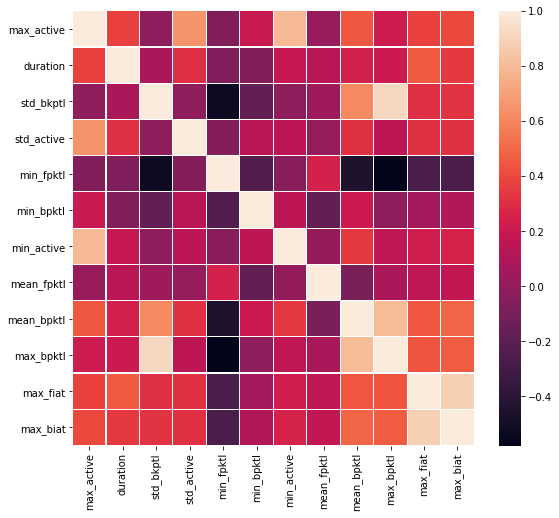

In [141]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(feature_corrmat, ax = ax, linewidths = 0.2) 

Paiplot is used to visualize the correlation diagonals are histogram it means variables are related to each and correlation
are scatterplot, it give the realtionship between other variables

<Figure size 2160x1800 with 0 Axes>

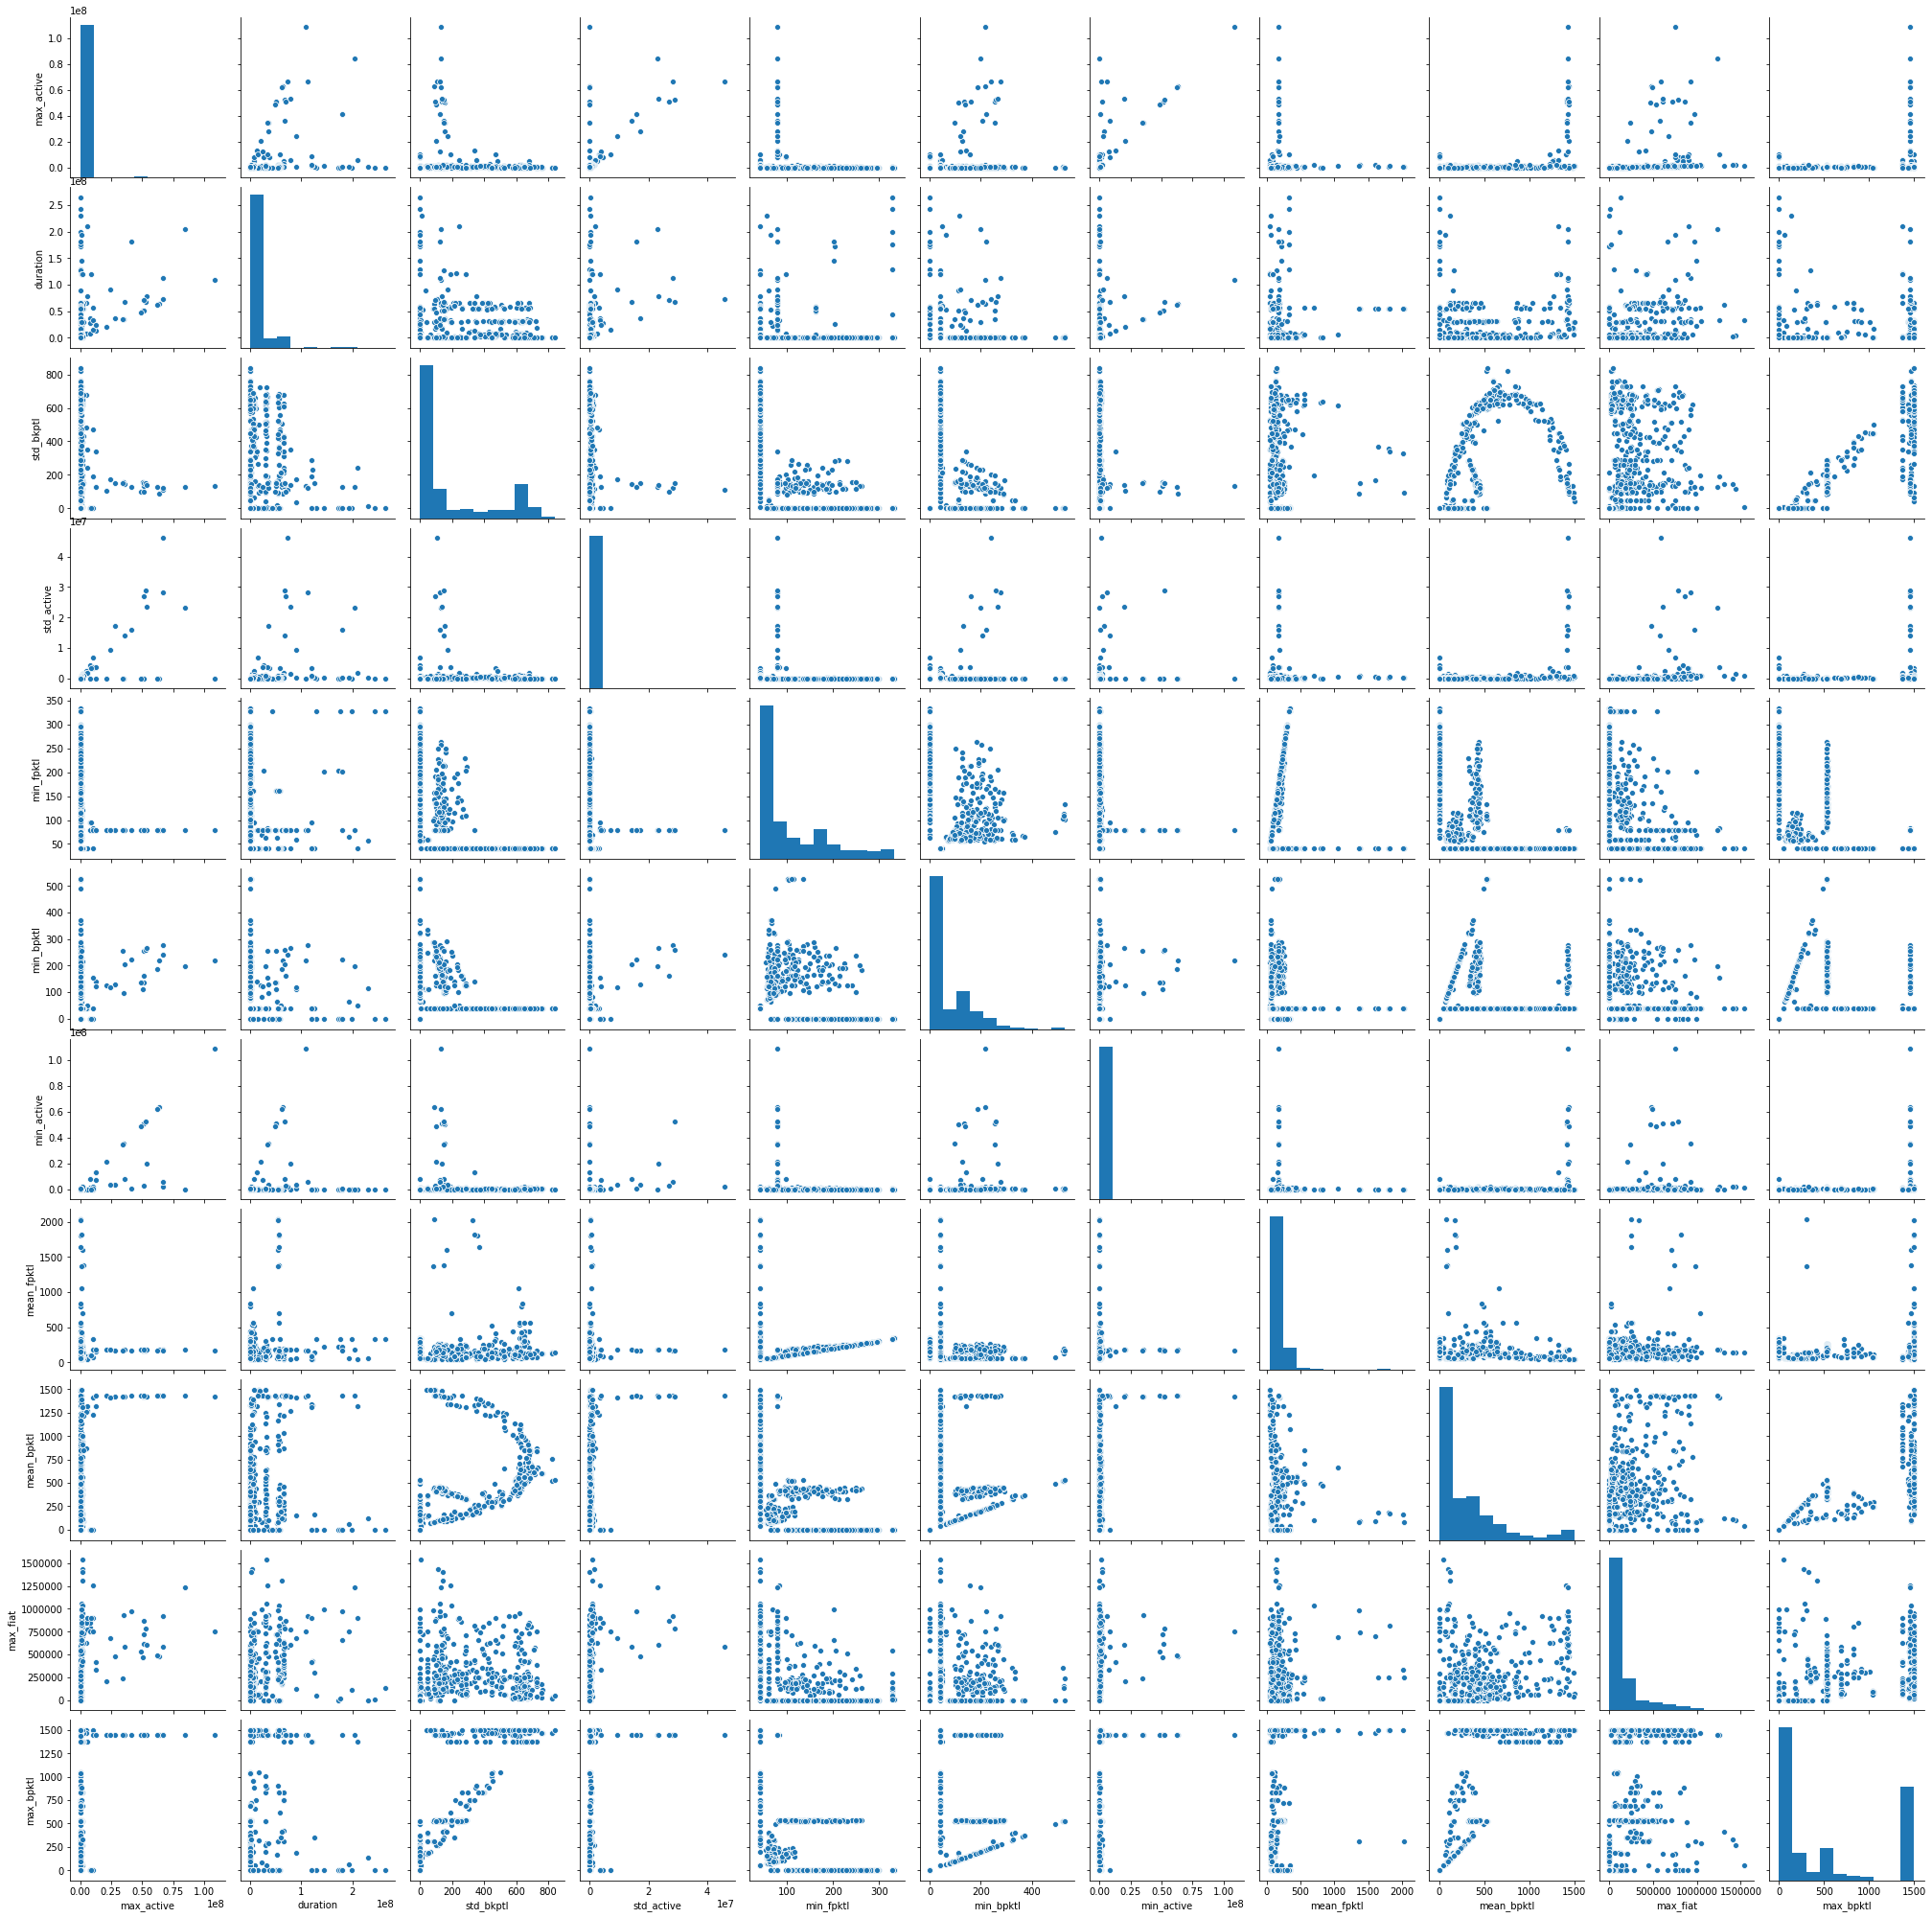

In [142]:
plt.figure(figsize=(30,25))
sns.pairplot(feature_coorelation[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl']])
plt.show()